# Spotify Genre Clustering - Data Analysis

## Importing libraries

In [1]:
# Suppress warnings.
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package.
import numpy as np
import pandas as pd

# Visualisation Libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors

# Metrics, normalization and clustering package.
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

## Exploratory Data Analysis 

In [2]:
# Checking missing value formats and read data.
missing_value_formats = ["na", "n.a.", "?", "NA", "n/a", "--"]
artists = pd.read_csv("data_by_genres.csv", na_values=missing_value_formats)

# Checking missing values.
if artists.isna().sum().sum() == 0:
    print("No missing values.")
else:
    print("There are missing values in the data.")

# Display first and last 5 records.
display(artists.head())
display(artists.tail())

# Display shape.
print("Shape of the dataset:", artists.shape)
print("\nInformation about the dataset:\n")

# Returns the info.
artists.info()

No missing values.


,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
2968,1,zolo,0.222625,0.547082,258099.064530,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,206320.000000,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,306072.777778,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,198417.333333,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7
2972,1,zydeco,0.421038,0.629409,171671.690476,0.609369,0.019248,0.255877,-9.854825,0.050491,126.366087,0.808544,30.261905,7


Shape of the dataset: (2973, 14)

Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [3]:
initial_count = len(artists)
artists.drop_duplicates(inplace=True)
removed_count = initial_count - len(artists)
print(f"Number of duplicates removed: {removed_count}")

Number of duplicates removed: 0


In [4]:
artists.drop(columns = ["genres", "mode", "key"], inplace = True)
artists.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071


## Normalizing dataset values

It is important to normalize them, as each one is within a different range.

In [5]:
values = Normalizer().fit_transform(artists.values)
values

array([[6.10946629e-06, 1.01613026e-06, 9.99999855e-01, ...,
        4.69978701e-04, 6.47441229e-07, 1.73635274e-04],
       [4.71718916e-07, 2.85381777e-07, 9.99999992e-01, ...,
        1.14679301e-04, 2.11414507e-07, 5.00530399e-05],
       [6.61589918e-06, 6.18178506e-06, 9.99999239e-01, ...,
        1.15859849e-03, 8.46522533e-06, 4.16749555e-04],
       ...,
       [8.60125801e-07, 2.44676722e-06, 9.99999932e-01, ...,
        3.33140425e-04, 2.69253300e-06, 1.52469174e-04],
       [5.00460255e-06, 3.55647654e-06, 9.99999892e-01, ...,
        4.60030324e-04, 3.72447260e-06, 0.00000000e+00],
       [2.45257893e-06, 3.66635027e-06, 9.99999712e-01, ...,
        7.36091376e-04, 4.70982382e-06, 1.76277731e-04]])

## Clustering Algorithm  (kmeans)

In [6]:
SEED = 4242564

This code defines a function called clustering that takes two parameters: n_clusters (number of clusters) and dataset (input data for clustering). Inside the function, it performs K-means clustering using KMeans from scikit-learn library. It calculates the Silhouette score, Davies Bouldin score, and Calinski Harabasz score using metrics from scikit-learn. Finally, it prints the scores using the print statement.

In [7]:
def clustering(n_clusters, dataset):
    
    # Kmeans.
    kmeans = KMeans(n_clusters, n_init = 10, max_iter = 300, random_state = SEED)
    labels = kmeans.fit_predict(dataset)
    
    # Silhoette.
    silhouette = metrics.silhouette_score(dataset, labels, metric = "euclidean")
    
    # Davies Bouldin Score.
    dbs = metrics.davies_bouldin_score(dataset, labels)
    
    # Calinski Harabasz Score.
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    
    print("Silhouette: {} | Daniel Bouldin: {} | Calinski Harabasz: {}".format(silhouette, dbs, calinski))

In [8]:
for i in range(3, 11):
    
    print("Number of clusters = " + str(i))
    clustering(i, values)
    print("=============")

Number of clusters = 3
Silhouette: 0.39075676253774955 | Daniel Bouldin: 0.8613969849363751 | Calinski Harabasz: 1789.6880182544323
Number of clusters = 4
Silhouette: 0.3897536238813099 | Daniel Bouldin: 0.7526868954353372 | Calinski Harabasz: 2057.084490455712
Number of clusters = 5
Silhouette: 0.3433098358184658 | Daniel Bouldin: 0.8646076831440677 | Calinski Harabasz: 2115.697747463593
Number of clusters = 6
Silhouette: 0.365078151542049 | Daniel Bouldin: 0.7938880395116245 | Calinski Harabasz: 2136.627231845528
Number of clusters = 7
Silhouette: 0.34041311231289745 | Daniel Bouldin: 0.8196714218537491 | Calinski Harabasz: 2089.949958775207
Number of clusters = 8
Silhouette: 0.3112776372123912 | Daniel Bouldin: 0.8751624216841981 | Calinski Harabasz: 2035.2649693676037
Number of clusters = 9
Silhouette: 0.31848451778305775 | Daniel Bouldin: 0.8879455830049275 | Calinski Harabasz: 1967.5730584376972
Number of clusters = 10
Silhouette: 0.3219075623112024 | Daniel Bouldin: 0.8411057760

## Based on the above data, we chose 6 as the number of clusters to be created and analyzed.

- **Silhouette Score:** The Silhouette score measures the compactness and separation of clusters, ranging between -1 and 1. A value closer to 1 indicates that the clusters are well-separated and compact, with data points within each cluster being more similar to each other than to data points in other clusters. A positive Silhouette score generally indicates good cluster creation. Among the provided results, the clustering with 6 clusters has a Silhouette score of 0.365, suggesting relatively well-separated clusters.


- **Davies Bouldin Score:** The Davies Bouldin score assesses the quality of clustering results, with values ranging from 0 to infinity. A lower value indicates better clustering, with well-separated and distinct clusters. The clustering with 6 clusters has a Davies Bouldin score of 0.794, indicating reasonably well-defined clusters.


- **Calinski Harabasz Score:** The Calinski Harabasz score measures the ratio of between-cluster variance to within-cluster variance. A higher score is indicative of better clustering, with well-separated and distinct clusters. Among the provided results, the clustering with 6 clusters has a Calinski Harabasz score of 2136.627, suggesting good separation and high inter-cluster variance.

Based on these metrics, the clustering with 6 clusters appears to be a promising choice, as it shows relatively high Silhouette score, reasonably low Davies Bouldin score, and a high Calinski Harabasz score. However, it's important to note that the selection of the "best" number of clusters ultimately depends on the specific context, domain knowledge, and the goals of the analysis.

In [9]:
n_clusters = 6

### Creating cluster labels

As we have 6 clusters, the labels will be numbered from 0 to 6.

In [10]:
kmeans = KMeans(n_clusters, n_init = 10, max_iter = 300, random_state = SEED)
y_pred = kmeans.fit_predict(values)
labels = kmeans.labels_
np.unique(labels, return_counts = True)

(array([0, 1, 2, 3, 4, 5], dtype=int32),
 array([1175,  143,  304,  649,    4,  698]))

In [11]:
artists["cluster"] = labels
artists.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,cluster
0,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,0
1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,3
2,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,1
3,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,0
4,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,5


In [12]:
# Original column names.
original_columns = ['acousticness', 'danceability', 'duration_ms', 'energy',
                    'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
                    'valence', 'popularity', 'cluster']

# New column names.
new_columns = ['Acousticness', 'Danceability', 'Duration (ms)', 'Energy',
               'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo',
               'Valence', 'Popularity', 'Cluster']

# Rename columns
artists.columns = new_columns

## Extracting information from clusters (Visualizations)

In [13]:
def scatter(dataset, x, y, xlabel, ylabel, title):
    
    sns.lmplot(data = dataset, x = x, y = y, hue = "Cluster", height = 5, aspect = 1.6,
               fit_reg = False, legend = True, legend_out = True,
              scatter_kws = {"s": 10})
    
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    plt.title(title, fontsize = 20)
    
    plt.show()

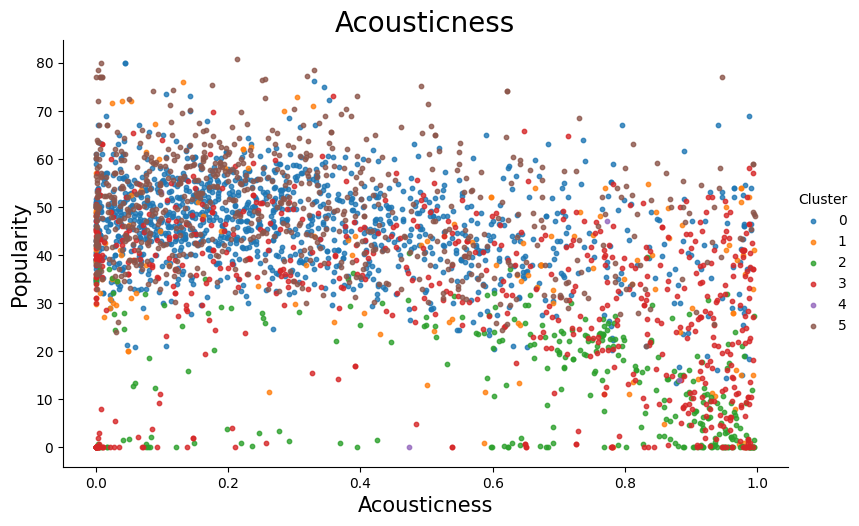

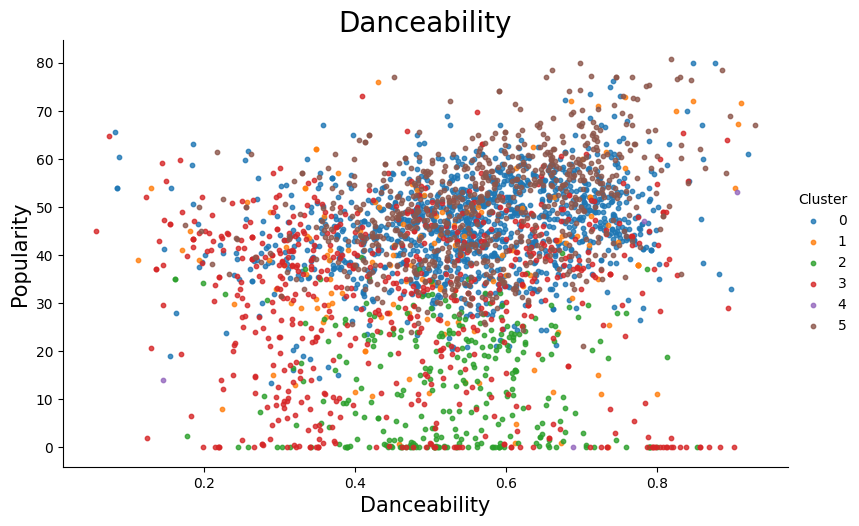

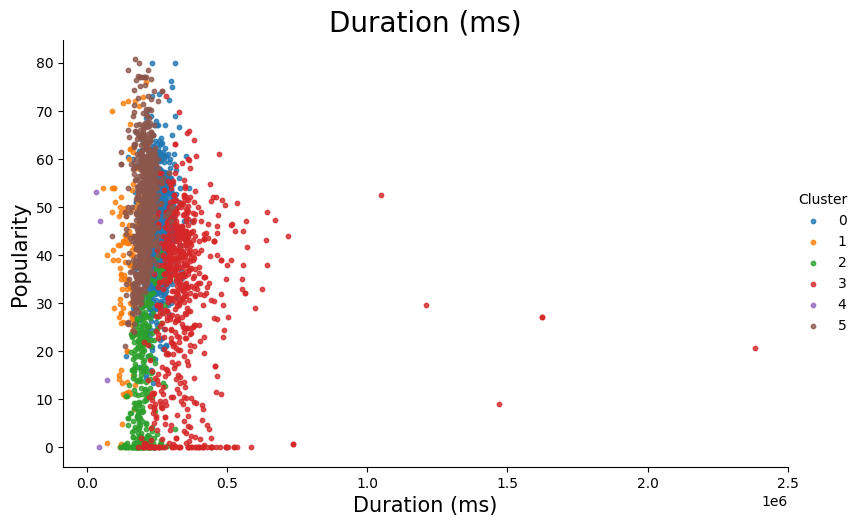

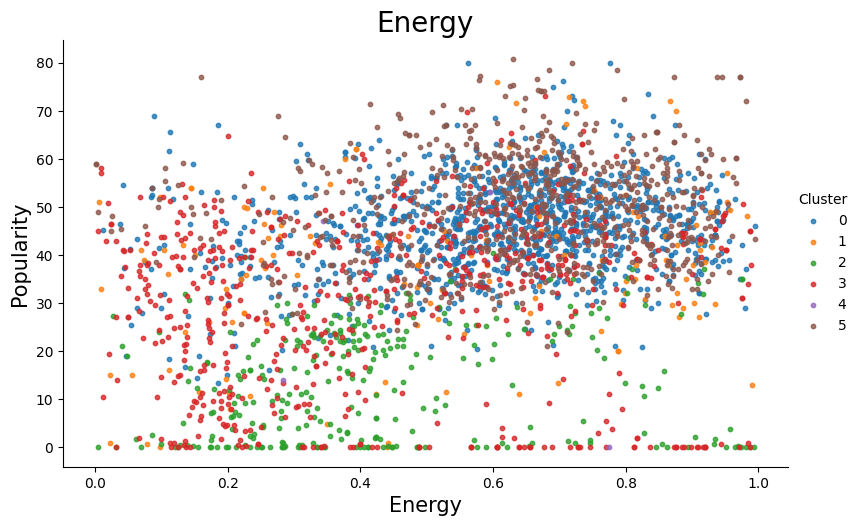

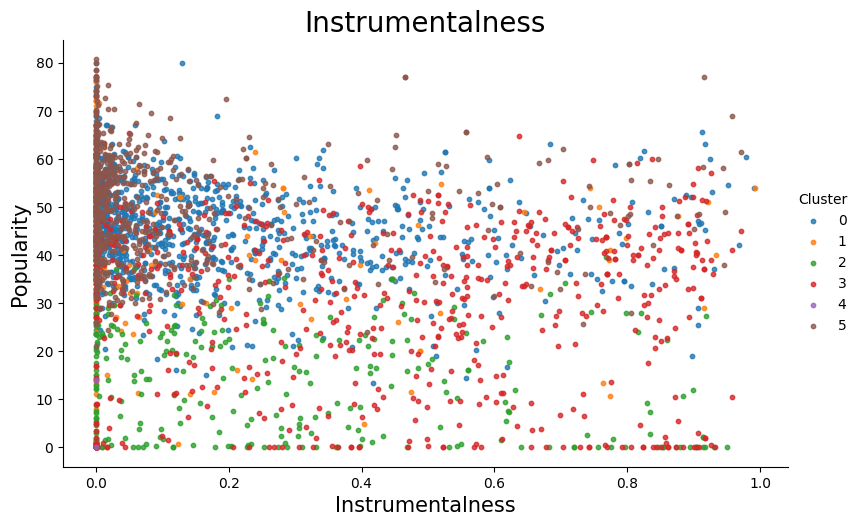

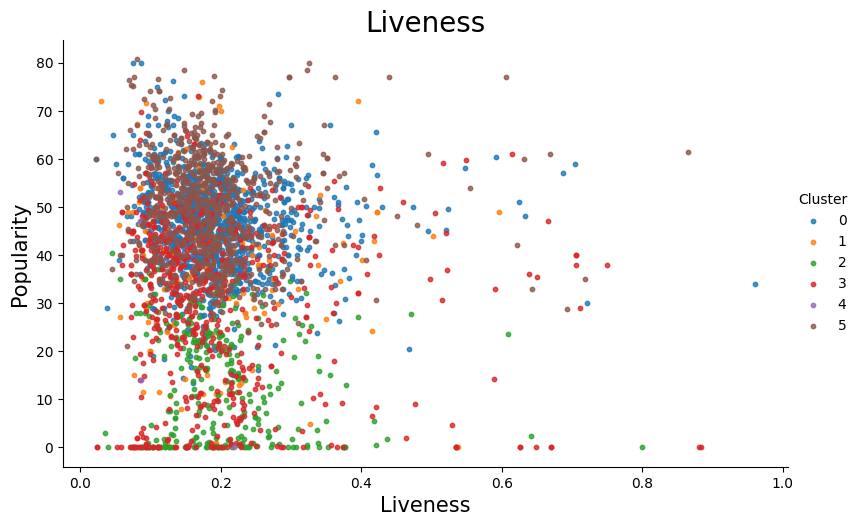

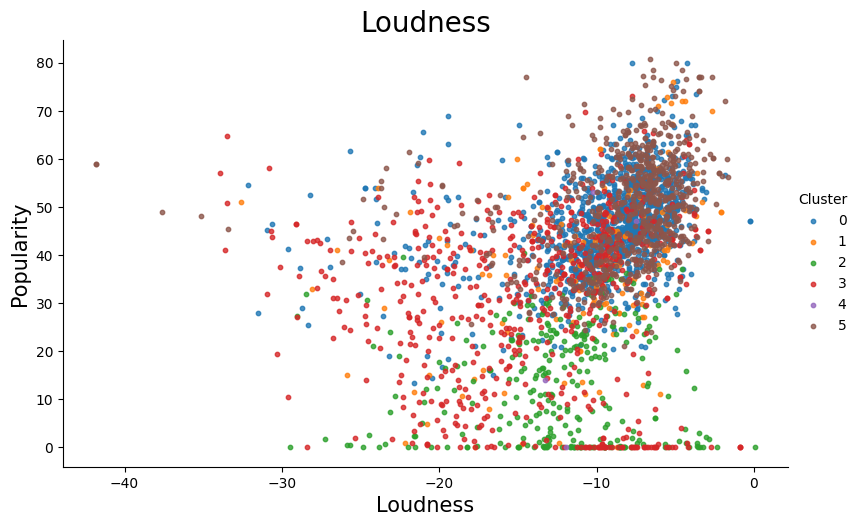

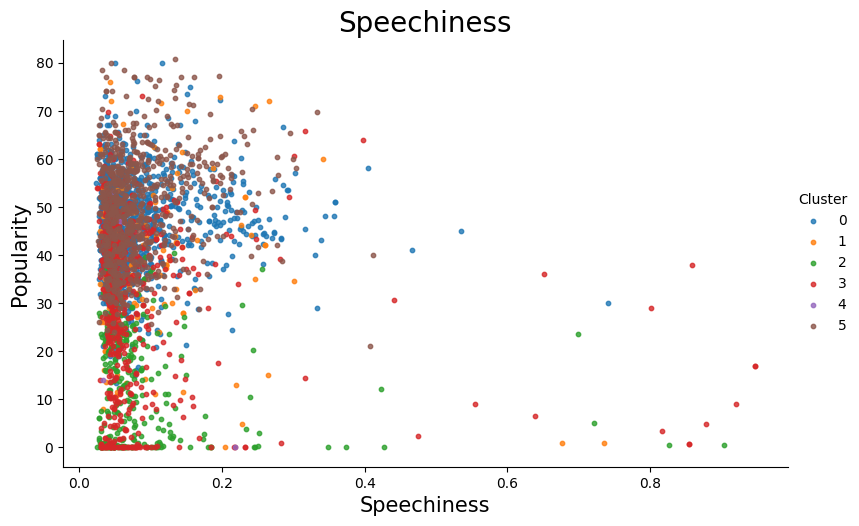

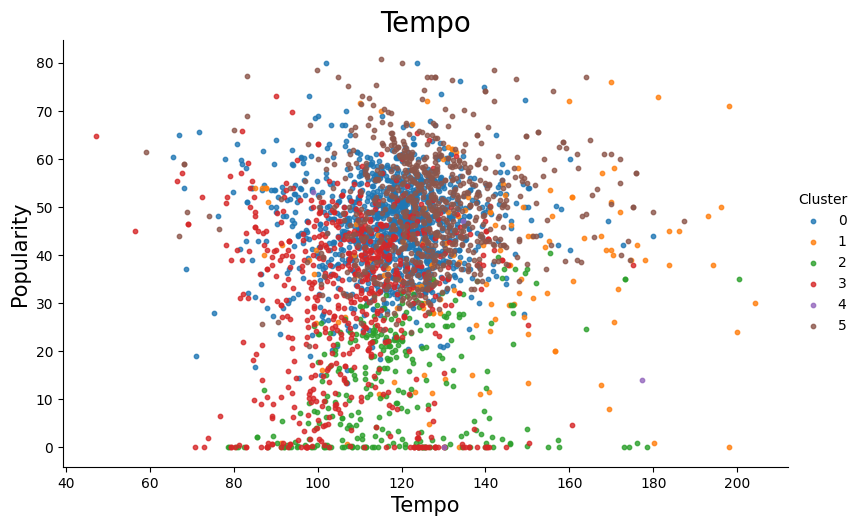

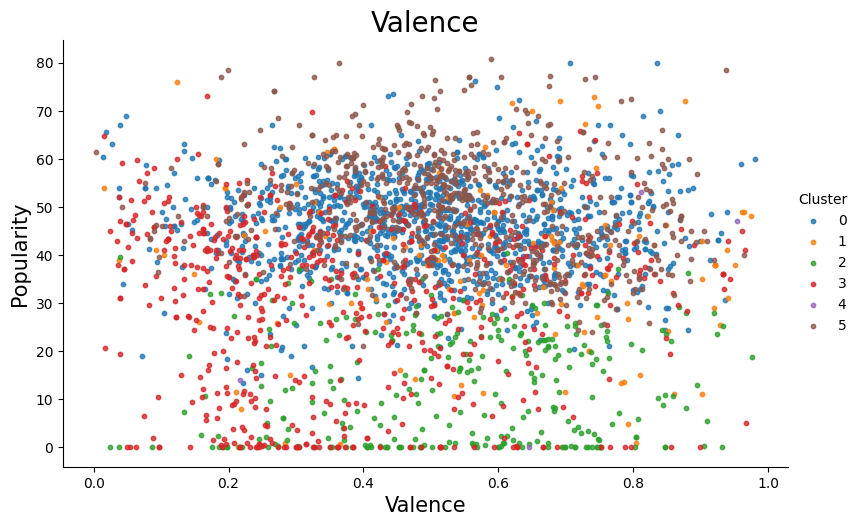

In [14]:
for column in artists.columns:
    if column != "Cluster" and column != "Popularity":
        scatter(artists, column, "Popularity", column, "Popularity", column)

Visually, we can gather some information, but it doesn't seem to be the ideal method. Therefore, let's analyze the descriptive statistics of each cluster.

In [15]:
centroids = kmeans.cluster_centers_
centroids

array([[ 1.30916214e-06,  2.25677835e-06,  9.99999868e-01,
         2.45389016e-06,  6.31401911e-07,  7.76236345e-07,
        -3.82757097e-05,  3.27683028e-07,  4.72580405e-04,
         2.03167681e-06,  1.85502337e-04],
       [ 3.65067230e-06,  3.71790345e-06,  9.99999476e-01,
         3.64798113e-06,  1.36856454e-06,  1.36505481e-06,
        -8.30522432e-05,  7.54932548e-07,  9.59056208e-04,
         4.10905671e-06,  2.69470997e-04],
       [ 3.61977906e-06,  2.73295475e-06,  9.99999809e-01,
         2.16550632e-06,  1.37592839e-06,  1.06100375e-06,
        -6.51506465e-05,  4.56143850e-07,  6.02019461e-04,
         2.81310229e-06,  6.72119113e-05],
       [ 1.64556374e-06,  1.42415453e-06,  9.99999937e-01,
         1.34792663e-06,  1.20614317e-06,  5.83247671e-07,
        -4.24548314e-05,  2.42627132e-07,  3.27286194e-04,
         1.20581402e-06,  9.24535547e-05],
       [ 1.09589922e-05,  1.62004263e-05,  9.99995126e-01,
         1.22474210e-05,  4.83885116e-10,  2.50793092e-06,
  

In [16]:
max = len(centroids[0])

for i in range(max):
    print("Coluna: {} - Variância: {}".format(artists.columns.values[i], centroids[:, i].var()))

Coluna: Acousticness - Variância: 1.1210904203966387e-11
Coluna: Danceability - Variância: 2.617493508911594e-11
Coluna: Duration (ms) - Variância: 3.0200826307290264e-12
Coluna: Energy - Variância: 1.3588623347447279e-11
Coluna: Instrumentalness - Variância: 2.5250445042838977e-13
Coluna: Liveness - Variância: 3.9657363977816246e-13
Coluna: Loudness - Variância: 5.082839630479878e-09
Coluna: Speechiness - Variância: 4.0561802226163107e-13
Coluna: Tempo - Variância: 7.948009376125723e-07
Coluna: Valence - Variância: 2.727950550965935e-11
Coluna: Popularity - Variância: 4.9961922709215084e-08


We then choose the columns with the highest variance.

1. Popularity - Variance: 4.9961922709215064e-08
2. Danceability - Variance: 2.617493508911594e-11
3. Valence - Variance: 2.727950550965935e-11
4. Energy - Variance: 1.3588623347447279e-11
5. Acousticness - Variance: 1.1210904203966387e-11
6. Duration (ms) - Variance: 3.0200826307290264e-12
7. Loudness - Variance: 5.082839630479878e-09
8. Tempo - Variance: 7.948009376125723e-07
9. Instrumentalness - Variance: 2.5250445042838977e-13
10. Liveness - Variance: 3.9657363977816246e-13
11. Speechiness - Variance: 4.0561802226163107e-13

In [17]:
description = artists.groupby("Cluster")[["Acousticness", "Danceability", "Energy", "Duration (ms)", "Valence", "Popularity"]]
size = description.size()
description = description.mean()
description["size"] = size
description

,Acousticness,Danceability,Energy,Duration (ms),Valence,Popularity,size
Cluster,,,,,,,
0,0.313603,0.557394,0.612392,250405.910163,0.500263,45.902954,1175
1,0.476671,0.515082,0.533951,147706.632087,0.578156,37.982639,143
2,0.679877,0.527253,0.432078,198753.316960,0.539916,13.554950,304
3,0.525453,0.469186,0.448766,352997.764650,0.390549,30.898469,649
4,0.556700,0.630750,0.499500,47445.500000,0.656750,28.500000,4
5,0.295577,0.574718,0.641494,205316.286928,0.536139,50.178276,698


## Data dictionary:

1. Acousticness: A measure of the acoustic presence in a song, ranging from 0 (least acoustic) to 1 (most acoustic).
2. Danceability: Represents the suitability of a song for dancing, ranging from 0 (least danceable) to 1 (most danceable).
3. Duration (ms): The duration of a song in milliseconds, indicating the length of the song.
4. Energy: Refers to the intensity and activity level of a song, ranging from 0 (low energy) to 1 (high energy).
5. Instrumentalness: Measures the likelihood of a song being instrumental, ranging from 0 (vocal) to 1 (instrumental).
6. Liveness: Represents the probability of a song being performed live, ranging from 0 (studio recording) to 1 (live performance).
7. Loudness: Represents the overall loudness of a song in decibels (dB), ranging from negative values (quieter) to positive values (louder).
8. Speechiness: Measures the presence of spoken words in a song, ranging from 0 (music only) to 1 (spoken word only).
9. Tempo: The tempo of a song in beats per minute (BPM), indicating the speed or pace of the song.
10. Valence: Reflects the musical positiveness conveyed by a song, ranging from 0 (negative) to 1 (positive).
11. Popularity: Represents the popularity or fame of a song, ranging from 0 (least popular) to 100 (most popular).

## Cluster Summary:

Cluster 0:
- Artists whose songs have low acousticness.
- Artists whose songs have reasonable danceability.
- Songs with moderate energy.
- Songs with medium duration.
- Songs with neutral valence.
- Moderate popularity.
- Large cluster size.

Cluster 1:
- Artists whose songs have high acousticness.
- Artists whose songs have high danceability.
- Songs with moderate energy.
- Songs with longer duration.
- Songs with higher valence.

Cluster 2:
- Artists whose songs have low acousticness.
- Artists whose songs have higher danceability (with a small difference).
- Songs with lower energy.
- Songs with medium duration.
- Popular artists.
- Large cluster size.

Cluster 3:
- Artists whose songs have high acousticness.
- Artists whose songs have lower danceability (with a small difference).
- Songs with lower energy.
- Songs with longer duration.
- Less popular artists.
- Small cluster size.

Cluster 4:
- Artists whose songs have moderate acousticness.
- Artists whose songs have high danceability.
- Songs with moderate energy.
- Songs with very short duration.
- Songs with high valence.
- Less popular artists.
- Smallest cluster size.

Cluster 5:
- Artists whose songs have low acousticness.
- Artists whose songs have high danceability.
- Songs with high energy.
- Songs with medium duration.
- Songs with slightly positive valence.
- Songs with high popularity.
- Cluster with a moderate size.

These cluster summaries provide an overview of the characteristics for each cluster based on the attributes: acousticness, danceability, energy, duration, valence, popularity, and size.

## Conclusion:

In this project, we successfully applied K-means clustering to the Dataset of Songs in Spotify to group songs by genre. Based on the evaluation of different cluster configurations, we selected 6 clusters as a promising choice. The clustering analysis revealed relatively well-separated clusters with a Silhouette score of 0.365, indicating their distinctiveness. Additionally, the Davies Bouldin score of 0.794 suggested reasonably well-defined clusters, and the Calinski Harabasz score of 2136.627 indicated good separation and high inter-cluster variance.

By visually inspecting the clusters and labeling the variables accordingly, we gained valuable insights into the characteristics of songs within each cluster. This analysis provides important information for music recommendation systems and genre classification tasks.

It is worth noting that further refinements and explorations can be conducted to improve the clustering results. Implementation of other clustering techniques or adjustments in cluster sizes can be considered based on the specific research interests and objectives. Such refinements can lead to enhanced genre representation and more precise analysis.